tgb - 11/1/2019 - Making figures for the UW+UCI paper from reduced pkl data

In [1]:
import math

import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import *

import numpy as np

import pickle

IMPORTANT: Define path to .pkl data and to where .pdf figures are saved below:

In [2]:
pathPKL = '/home1/05823/tg851228/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA/'
pathPDF = '/home1/05823/tg851228/'

# Figure 2

## Load data

In [3]:
NNname = 'STAB'
path = pathPKL+'9_30_Fig2_'+NNname+'.pkl'
hf = open(path,'rb')
S = pickle.load(hf)

## Plot figure

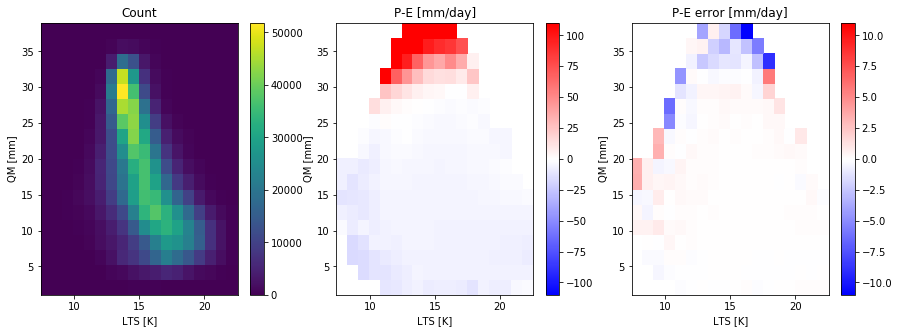

In [4]:
X = 0.5*(S['LTSspace'][:-1]+S['LTSspace'][1:])
Y = 0.5*(S['QMspace'][:-1]+S['QMspace'][1:])

option_array = ['Weights','Precip','Pano']

fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,option in enumerate(option_array):
    
    if option=='Weights': C = S['Whist']; vlim=False; tit='Count'; cmaps = 'viridis'
    elif option=='Precip': C = S['PREChist'][NNname]; vlim=True; vmin = -110; vmax = 110; cmaps = 'bwr'; tit='P-E [mm/day]'
    elif option=='Heating': C = S['HEAThist'][NNname]; vlim=True; vmin = -3.5e3; vmax = 3.5e3; cmaps = 'bwr'; tit='Net heating [W/m2]'
    elif option=='Pano': C = S['PREChist'][NNname]-S['PREChist']['truth']; vlim=True; vmin = -11; vmax = 11; cmaps = 'bwr'; tit='P-E error [mm/day]'
    elif option=='Hano': C = S['HEAThist'][NNname]-S['HEAThist']['truth']; vlim=True; vmin = -70; vmax = 70; cmaps = 'bwr'; tit='Heating error [mm/day]'

    ax0 = ax[i]
    if vlim: im = ax0.pcolormesh(X, Y, C, vmin=vmin, vmax=vmax, cmap=cmaps)
    else: im = ax0.pcolormesh(X, Y, C, cmap=cmaps)

    plt.colorbar(im, ax=ax0)
    ax0.set_xlabel('LTS [K]')
    ax0.set_ylabel('QM [mm]')
    ax0.set_title(tit)
    
plt.savefig(pathPDF+'Figure2.pdf',format='pdf')

# Figure 3

## Load data for both Figure 3 and Figure 4

In [5]:
NNname = 'STAB'
path = pathPKL+'9_30_Fig3_'+NNname+'.pkl'
hf = open(path,'rb')
S34 = pickle.load(hf)

## Load data for coordinates

In [6]:
path = pathPKL+'11_2_SPCAM_coordinates.pkl'
hf = open(path,'rb')
Scoor = pickle.load(hf)

## Plot Figure

TypeError: You must first set_array for mappable

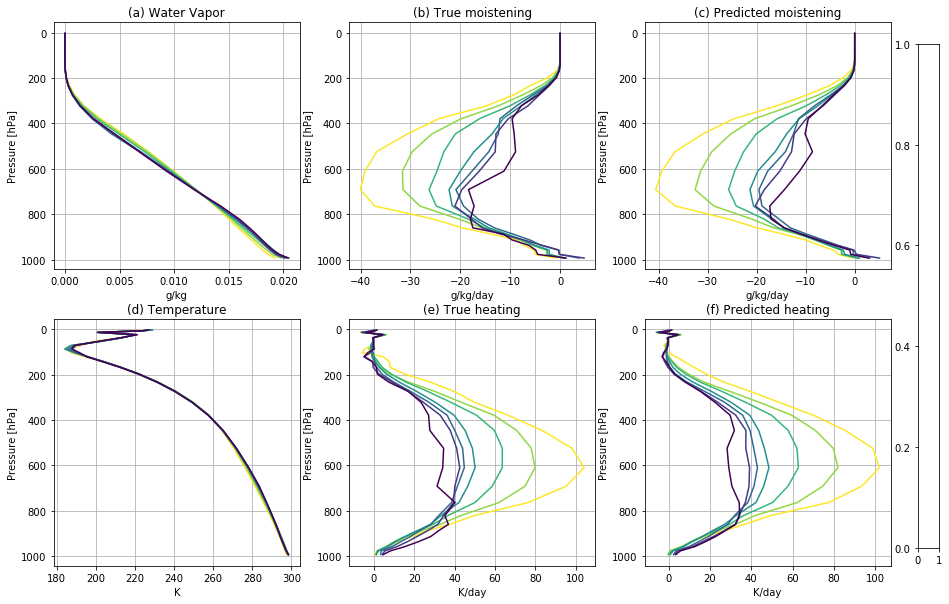

In [7]:
iQM = 16 # Choose fixed mid-tropospheric moisture value

fig, ax = plt.subplots(2,3,figsize=(15,10))

title_array = ['(a) Water Vapor','(b) True moistening','(c) Predicted moistening','(d) Temperature','(e) True heating','(f) Predicted heating']
xlab_array = ['g/kg','g/kg/day','g/kg/day','K','K/day','K/day']

# Determine range of lower-tropospheric stabilities for which count>0
n = 0
for iLTS,edgeLTS in enumerate(S['LTSspace']):
        if iLTS*S['Whist'][iQM,iLTS-1]>0: 
            if n==0: iLTSmin = iLTS
            n+=1
            iLTSmax = iLTS
            
colors = pl.cm.viridis(np.linspace(0,1,n))
colors = colors[::-1,:] # Flip color palette to have moist in blue like Noah

for i,tit in enumerate(title_array):
    ax0 = ax[math.floor(i/3),i%3]
    
    if i==0: toplt = S34['QVhist']
    elif i==1: toplt = 1e3*24*3600*S34['dqdthist']['truth']
    elif i==2: toplt = 1e3*24*3600*S34['dqdthist'][NNname]
    elif i==3: toplt = S34['Thist'] # Replace with Thist ASAP
    elif i==4: toplt = 24*3600*S34['dTdthist']['truth']
    elif i==5: toplt = 24*3600*S34['dTdthist'][NNname]
    
    ncol = 0
    for iLTS,edgeLTS in enumerate(S['LTSspace']):
        if iLTS*S['Whist'][iQM,iLTS-1]>0: 
            ncol+=1
            ax0.plot(toplt[iQM,iLTS-1,:],Scoor['lev'],color=colors[ncol-1])
    
    ax0.set_xlabel(xlab_array[i])
    ax0.set_ylabel('Pressure [hPa]')
    ax0.set_title(tit)
    ax0.invert_yaxis()
    ax0.grid()
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.925, 0.15, 0.02, 0.7])
clb = fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=S['LTSspace'][iLTSmin],
                                                                      vmax=S['LTSspace'][iLTSmax],
                                                                      clip=False),
                                     cmap= ListedColormap(colors)),cax=cbar_ax)
clb.ax.set_title('LTS [K]')

gcf().suptitle("Mid-tropospheric humidity bin: "+"%02.1f"%(0.5*(S['QMspace'][iQM]+S['QMspace'][iQM+1]))+"mm", fontsize=14)
plt.savefig(pathPDF+'Figure3.pdf',format='pdf')

# Figure 4

## Plot figure

In [ ]:
iLTS = 5 # Choose fixed lower-tropospheric stability

fig, ax = plt.subplots(2,3,figsize=(15,10))

title_array = ['(a) Water Vapor','(b) True moistening','(c) Predicted moistening','(d) Temperature','(e) True heating','(f) Predicted heating']
xlab_array = ['g/kg','g/kg/day','g/kg/day','K','K/day','K/day']

# Determine range of mid-tropospheric moistures for which count>0
n = 0
for iQM,edgeQM in enumerate(S['QMspace']):
        if iQM*S['Whist'][iQM-1,iLTS]>0: 
            if n==0: iQMmin = iQM
            n+=1
            iQMmax = iQM
colors = pl.cm.Blues(np.linspace(0,1,n))

for i,tit in enumerate(title_array):
    ax0 = ax[math.floor(i/3),i%3]
    
    if i==0: toplt = S34['QVhist']
    elif i==1: toplt = 1e3*24*3600*S34['dqdthist']['truth']
    elif i==2: toplt = 1e3*24*3600*S34['dqdthist'][NNname]
    elif i==3: toplt = S34['Thist'] # Replace with Thist ASAP
    elif i==4: toplt = 24*3600*S34['dTdthist']['truth']
    elif i==5: toplt = 24*3600*S34['dTdthist'][NNname]
    
    for iQM,edgeQM in enumerate(S['QMspace']):
        if iQM*S['Whist'][iQM-1,iLTS]>0:
            ax0.plot(toplt[iQM-1,iLTS,:],Scoor['lev'],color=colors[iQM-1])
    
    ax0.set_xlabel(xlab_array[i])
    ax0.set_ylabel('Pressure [hPa]')
    ax0.set_title(tit)
    ax0.invert_yaxis()
    ax0.grid()
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.925, 0.15, 0.02, 0.7])
clb = fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=S['QMspace'][iQMmin],
                                                                      vmax=S['QMspace'][iQMmax],
                                                                      clip=False),
                                     cmap= ListedColormap(colors)),cax=cbar_ax)
clb.ax.set_title('QM [g/kg]')

gcf().suptitle("LTS bin:"+str(0.5*(S['LTSspace'][iLTS]+S['LTSspace'][iLTS+1]))+"K", fontsize=14)
plt.savefig(pathPDF+'Figure4.pdf',format='pdf')

# Figure 9: TODO

# Figure 10

This code is converted from Prof. Pritchard Matlab's script

In [ ]:
# Generated with SMOP  0.41
from libsmop import *
# pub_instability_ensemble_forsharing (1).m

clear
close_('all')
amts=cellarray(['0.01','0.05','0.1','0.15','0.2','0.25'])
# pub_instability_ensemble_forsharing (1).m:2

n=length(amts)
# pub_instability_ensemble_forsharing (1).m:3
# load Linear_growth_rates.mat
figure
# control ini date
# Hard-coded table of results from the 4 prognostic tests:
maxstep[arange(),1]=concat([134,590,446,1499,2044,103])
# pub_instability_ensemble_forsharing (1).m:8

maxstep[arange(),2]=concat([651,566,332,363,1686,95])
# pub_instability_ensemble_forsharing (1).m:9

maxstep[arange(),3]=concat([512,678,337,840,2011,97])
# pub_instability_ensemble_forsharing (1).m:10

maxstep[arange(),4]=concat([297,504,866,1304,1999,118])
# pub_instability_ensemble_forsharing (1).m:11

# Attempt at a mean, std figure:
addpath('~/Library/matlab_utils')
hf=makeprintfig(5,5)
# pub_instability_ensemble_forsharing (1).m:15
themean=dot(1 / 48,squeeze(nanmean(maxstep.T)))
# pub_instability_ensemble_forsharing (1).m:16
thestd=dot(1 / 48,squeeze(nanstd(maxstep.T)))
# pub_instability_ensemble_forsharing (1).m:17
for k in arange(1,n).reshape(-1):
    famt[k]=str2num(amts[k])
# pub_instability_ensemble_forsharing (1).m:19

figure
X=concat([dot(100,famt),dot(100,fliplr(famt))])
# pub_instability_ensemble_forsharing (1).m:22
Y=concat([themean + thestd,fliplr(themean - thestd)])
# pub_instability_ensemble_forsharing (1).m:23
h=patch(X,Y,'k')
# pub_instability_ensemble_forsharing (1).m:24
set(h,'FaceColor',dot(0.8,concat([1,1,1])),'EdgeColor','None')
hold('on')
yyaxis('left')
plot(dot(100,famt),themean,'-o')
ylim(concat([0,45]))
ylabel('Time to actual prognostic failure (days)')
yyaxis('right')
plot(dot(Perturbation_std,100),1.0 / Growth_rate_daym1,'o')
ylim(concat([0,45]))
ylabel('Diagnostic inverse growth rate of most unstable mode (days)')
xlabel('Regularization \\sigma (%)')
grid('on')
#print_(gcf,'-dpdf','pritch_pub_instability_prognostic_v1.pdf')
plt.savefig(pathPDF+'Figure10.pdf',format='pdf')